<a href="https://colab.research.google.com/github/pushpitasaha/business_analytics_case_studies/blob/main/sales_analysis_and_prediction_saha_pushpita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case 1: Sales Analysis and Prediction (Questions 1, 2, and 3)

 You have been provided with the following monthly sales data for the past six months:

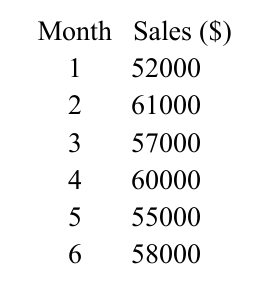


####Question 1:
 ● Write a Python function called `calculate_total_sales` that takes the sales data as a list
 and calculates the total sales across all months (combined). The function should return
 the result.

In [10]:
"""
Assumptions:
- input is a list of sales data over months, not considering the dictionary month:sales pairs
"""

def calculate_total_sales(sales_data):
  result = 0 # define and initialize result that will hold the total
  for data in sales_data:
    result += data
  return result

In [4]:
sales_data = [52000, 61000, 57000, 60000, 55000, 58000]

In [ ]:
calculate_total_sales(sales_data)

343000

In [15]:
# writing a simple test to see if sum calculation is correct
test_tsix = [2, 2, 1, 1]

In [13]:
calculate_total_sales(test_tsix)

NameError: name 'test_tsix' is not defined

In [ ]:
# Alternative approach: using built-in sum
# Better optimized than manual loop iteration
# More readable
def calculate_total_sales_v2(sales_data):
  return sum(sales_data)

In [ ]:
calculate_total_sales_v2(test_tsix)

6

In [7]:
#Further improvements: check for edge cases and raise errors
def calculate_total_sales_v3(sales_data):
  # if input is not a list
  if not isinstance(sales_data, list):
    raise ValueError("Input must be a list.")

  #check for empty list
  if len(sales_data) == 0:
    return 0 # total would be zero, also could raise ValueError

  # check if all items are numeric
  for data in sales_data:
    if not isinstance(data, (int, float)):
      raise ValueError("Every element in list must be numeric")
    if isinstance(data, float) and (data != data): #Check for NaN, null vals represented as a specific float
      raise ValueError("NaN value found in list, clean input and try again.")

  return sum(sales_data) # after all checks, finally count total

In [ ]:
import numpy as np #for nan value
test_null = [1, 2, np.nan, 5]
test_alpha = [1, 4, 3.5, 'a']
test_empty = []

In [ ]:
calculate_total_sales_v3(test_null) #should show value error and null message

ValueError: NaN value found in list, clean input and try again.

In [ ]:
calculate_total_sales_v3(test_alpha) #should show value error and not numeric message

ValueError: Every element in list must be numeric

In [ ]:
calculate_total_sales_v3(test_empty) #should show 0

0

#### Question 2:
 The company wants to predict the sales for the next 3 months (months 7, 8, 9) based on the
 average monthly sales from the historical data.

 ● Write a Python function called `predict_next_months_sales` that does the following:

 - a. Takes the sales data list as input
 - b. Calls the `calculate_total_sales` function to get the total sales
 - c. Calculates the average monthly sales by dividing the total sales by the number of
 months
 - d. Creates a list `next_months_sales` containing the predicted sales for the next 3
 months, assuming each month's sales will be the average monthly sales of all the
 months before.
 - e. Returns the `next_months_sales` list

In [8]:
def predict_next_months_sales(sales_data):
  next_months_sales = []
  copy_list = sales_data[:] # to not modify the OG list
  for i in range(3): # we only want next 3 months
    avgSoFar = calculate_total_sales(copy_list) / len(copy_list) # calculate average
    copy_list.append(avgSoFar) # add avg to input list
    next_months_sales.append(avgSoFar) # add avg to return list
  return next_months_sales

In [20]:
test_odds = [1, 3, 5]

In [22]:
predict_next_months_sales(sales_data)

[57166.666666666664, 57166.666666666664, 57166.666666666664]

In [21]:
predict_next_months_sales(test_odds)

[3.0, 3.0, 3.0]

####Question 3:
 ● Use conditional statements to write a function `analyze_sales_trend` that

 - takes the sales data list as input and
 - returns "Increasing" if the sales are increasing month-over-month,
 - "Decreasing" if the sales are decreasing month-over-month,
 - and "No Trend" otherwise.


In [28]:
# assuming the next 3 months of prediction is not be appended in provided historical sales data input
def analyze_sales_trend(sales_data):
  # handle case if data length is too short
  if len(sales_data) < 2:
    return "No Trend"

  trend = "No Trend" # initialize trend variable with no trend

  for i in range(len(sales_data) - 1): #iterate through the last index
    if sales_data[i + 1] > sales_data[i]: #if next data is big - Increasing
      if trend == "Decreasing":
        return "No Trend" # conflicts so we do early exit
      trend = "Increasing" # no conflict, set to Increase
    elif sales_data[i + 1] > sales_data[i]: #if next data is small - Decreasing
      if trend == "Increasing":
        return "No Trend" # conflicts so we do early exit
      trend = "Decreasing" # no conflict, set to Increase
  return trend

In [29]:
analyze_sales_trend(sales_data)

'Increasing'

In [30]:
analyze_sales_trend(test_odds)

'Increasing'

In [31]:
analyze_sales_trend(predict_next_months_sales(sales_data))

'No Trend'

In [ ]:
# Save changes in a cell to automate pushing updates to GitHub
# !git add your_notebook.ipynb
# !git commit -m "Auto-update notebook"
# !git push origin main  # Or the branch you're working on